### Read Dataset

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = 'D:\BIM\Summer Project\project\datasets\ibm-dataset.csv'
# Read dataset
df = pd.read_csv(path)

pd.options.display.max_columns = None

display(df.head(3))
print(df['MonthlyIncome'].max())
print(df['MonthlyIncome'].min())

<>:5: SyntaxWarning: invalid escape sequence '\B'
<>:5: SyntaxWarning: invalid escape sequence '\B'
C:\Users\sworn\AppData\Local\Temp\ipykernel_19956\2446146408.py:5: SyntaxWarning: invalid escape sequence '\B'
  path = 'D:\BIM\Summer Project\project\datasets\ibm-dataset.csv'


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0


19999
1009


### Clean Dataset

In [57]:
# Check missing values
# print(df.columns[df.isnull().sum() > 1])

# Drop missing values (apparently none)
df = df.dropna()

# Check missing values after dropping
print(df.columns[df.isnull().sum() > 1])

# Remove duplicates
df = df.drop_duplicates()

# Drop irrelevant columns: YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, TrainingTimesLastYear, StockOptionLevel, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, 'EmployeeCount', 'Over18', 'StandardHours'

df = df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                     'YearsWithCurrManager', 'TrainingTimesLastYear', 'StockOptionLevel', 'PercentSalaryHike', 'PerformanceRating',
                     'RelationshipSatisfaction', 'NumCompaniesWorked', 'BusinessTravel', 'DailyRate', 'HourlyRate', 'MonthlyRate'])

print(df.shape)
print(df.columns)

Index([], dtype='object')
(1470, 19)
Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'OverTime', 'TotalWorkingYears',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')


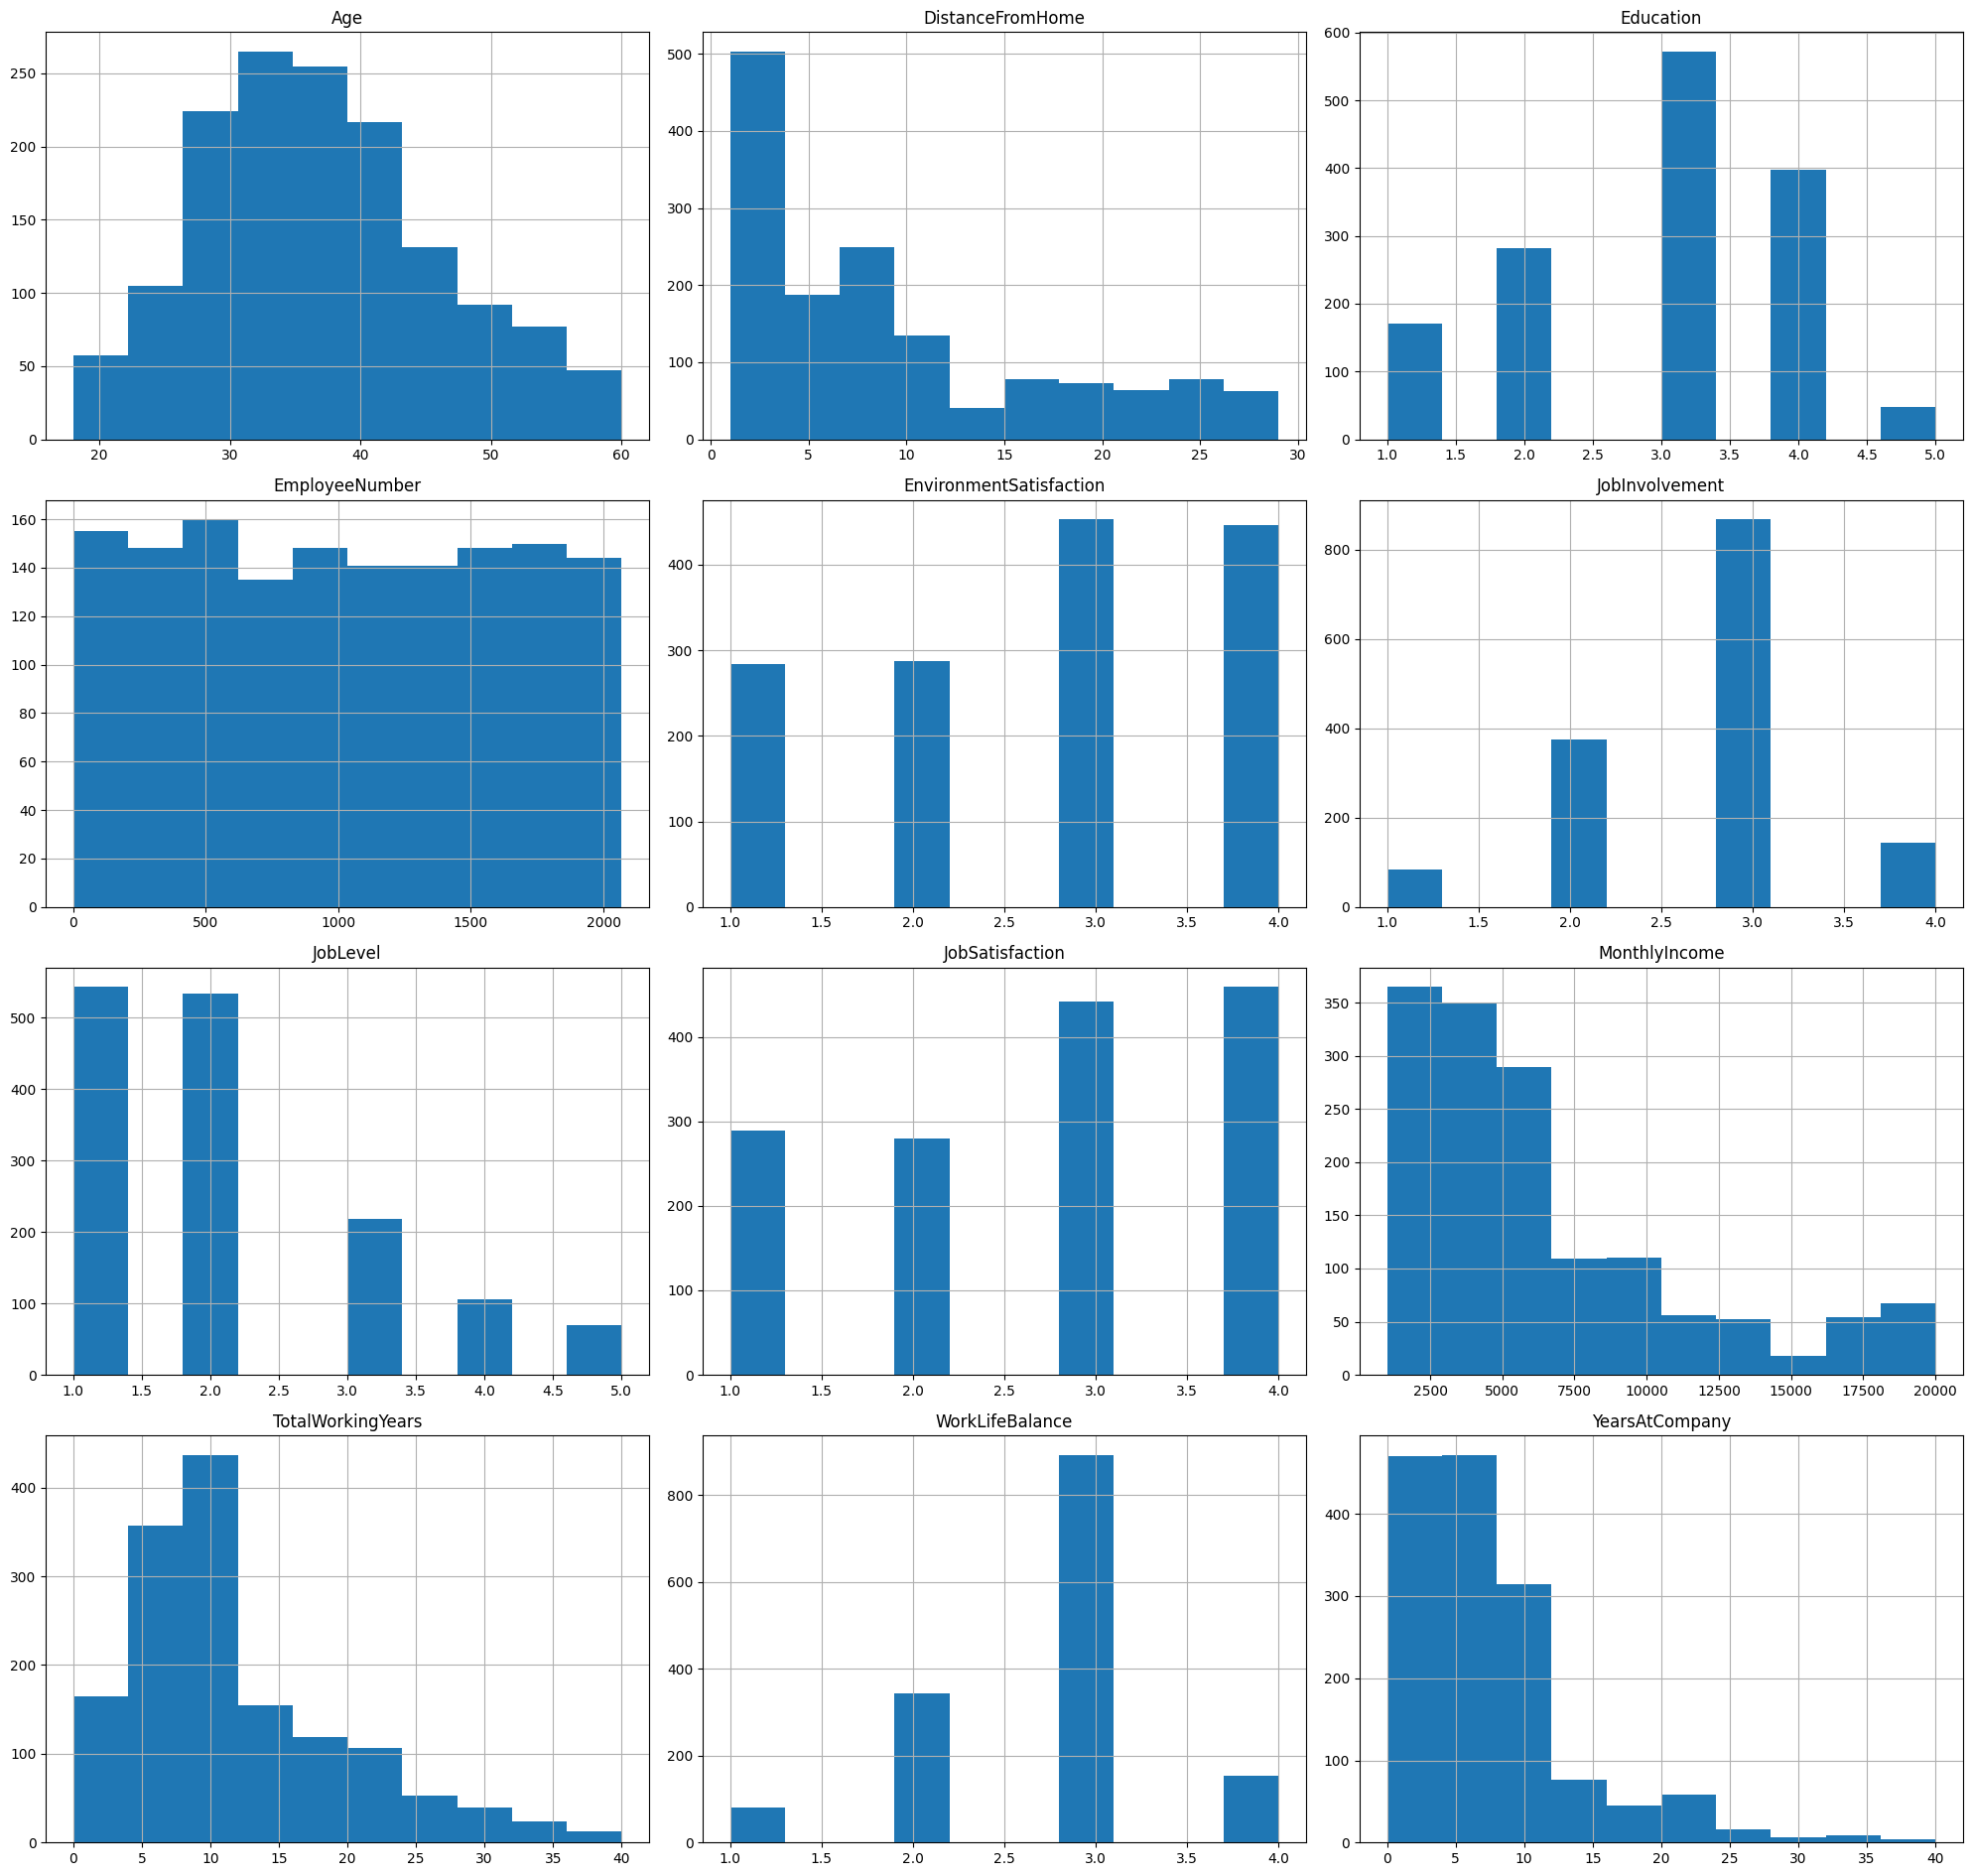

In [58]:
# Plot histograms to find irrelevant columns
df.hist(figsize=(20, 19))
plt.tight_layout()
plt.show()

### Extract 20 Rows for Analysis

In [ ]:
# Extract 20 rows and save to CSV (remove employee number for prediction)
df_20 = df.sample(20)
df_20 = df_20.drop(columns=['Attrition', 'EmployeeNumber'])
df_20.to_csv('extracted-20.csv', index=False)

#Remove df_20 from the original dataframe
df = df.drop(df_20.index)

# Save the cleaned dataset to a new CSV file
df.to_csv('ibm-dataset-cleaned.csv', index=False)

# Check the cleaned dataset
df_cleaned = pd.read_csv('ibm-dataset-cleaned.csv')

### Convert to Binary or One Hot Encoding

In [60]:
# Convert to Binary: Attrition, Gender, Over18, OverTime
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
# df['Over18'] = df['Over18'].map({'Y': 1, 'N': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})

# Convert to One Hot Encoding: BusinessTravel, Department, EducationField, JobRole, MaritalStatus, StockOptionLevel
# df = df.join(pd.get_dummies(df['BusinessTravel'])).drop('BusinessTravel', axis=1)
df = df.join(pd.get_dummies(df['Department'], prefix='Dept')).drop('Department', axis=1)
df = df.join(pd.get_dummies(df['EducationField'], prefix='EduField')).drop('EducationField', axis=1)
df = df.join(pd.get_dummies(df['JobRole'], prefix='JobRole')).drop('JobRole', axis=1)
df = df.join(pd.get_dummies(df['MaritalStatus'])).drop('MaritalStatus', axis=1)

#Convert One Hot Encoding to Binary
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)
df

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,Dept_Human Resources,Dept_Research & Development,Dept_Sales,EduField_Human Resources,EduField_Life Sciences,EduField_Marketing,EduField_Medical,EduField_Other,EduField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Divorced,Married,Single
0,41,1,1,2,1,2,0,3,2,4,5993,1,8,1,6,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,37,1,2,2,4,4,1,2,1,3,2090,1,7,3,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,3,4,5,4,0,3,1,3,2909,1,8,3,8,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,2,1,7,1,1,3,1,2,3468,0,6,3,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
5,32,0,2,2,8,4,1,3,1,4,3068,0,8,2,7,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,23,2,2061,3,1,4,2,4,2571,0,17,3,5,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1466,39,0,6,1,2062,4,1,2,3,1,9991,0,9,3,7,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1467,27,0,4,3,2064,2,1,4,2,2,6142,1,6,3,6,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1468,49,0,2,3,2065,4,1,2,2,2,5390,0,17,2,9,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


### Visualizing and Removing Unnecessary Columns

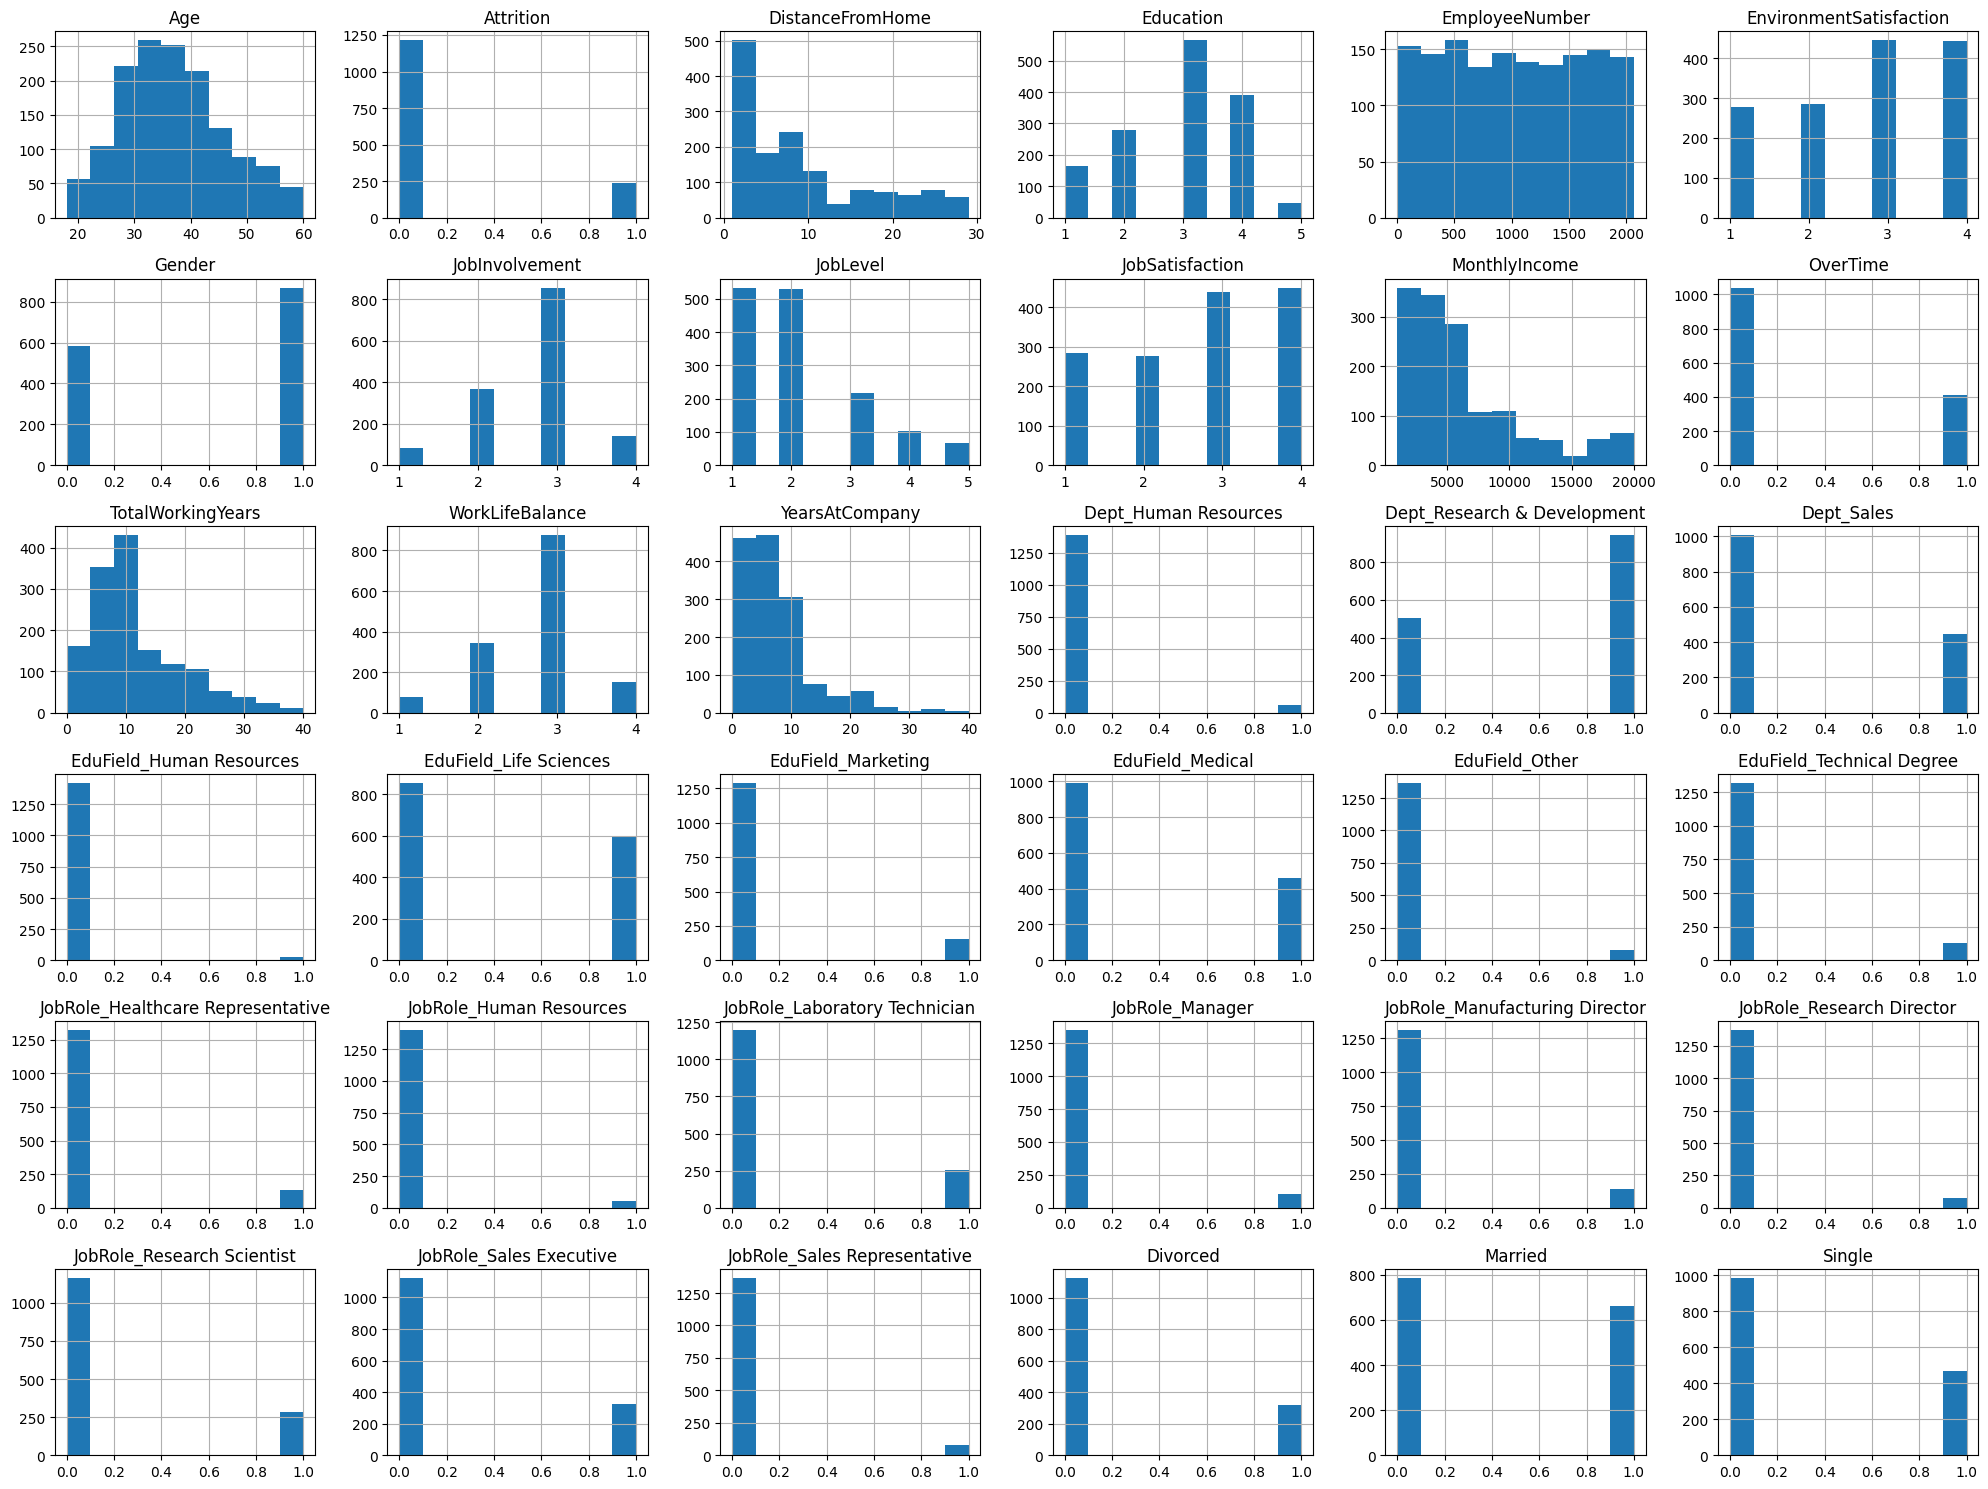

In [61]:
# Plot histograms to find irrelevant columns
df.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

In [62]:
# df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)
# df

### Save

In [63]:
# Save cleaned data as CSV
df.to_csv('D:\BIM\Summer Project\project\datasets\cleaned_ibm_dataset.csv', index=False)

# Save cleaned data as PKL
df.to_pickle('D:\BIM\Summer Project\project\datasets\cleaned_ibm_dataset.pkl')

<>:2: SyntaxWarning: invalid escape sequence '\B'
<>:5: SyntaxWarning: invalid escape sequence '\B'
<>:2: SyntaxWarning: invalid escape sequence '\B'
<>:5: SyntaxWarning: invalid escape sequence '\B'
C:\Users\sworn\AppData\Local\Temp\ipykernel_19956\4048453179.py:2: SyntaxWarning: invalid escape sequence '\B'
  df.to_csv('D:\BIM\Summer Project\project\datasets\cleaned_ibm_dataset.csv', index=False)
C:\Users\sworn\AppData\Local\Temp\ipykernel_19956\4048453179.py:5: SyntaxWarning: invalid escape sequence '\B'
  df.to_pickle('D:\BIM\Summer Project\project\datasets\cleaned_ibm_dataset.pkl')
